In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_exp = pd.read_json('/content/experiment_results.json')
df_info = pd.read_json('/content/infoVAE_results.json')
df_mmd  = pd.read_json('/content/mmd_curves.json')

In [ ]:
df_mmd

,"Fixed λ=500, α=1.0","Fixed λ=1000, α=1.0","Fixed λ=500, α=0.5","Fixed λ=1000, α=0.5","Fixed λ=500, α=0.0","Fixed λ=1000, α=0.0",Adaptive λ only,Adaptive α only,Adaptive λ and α
0,0.002222,0.002744,0.002328,0.002229,0.002321,0.001362,0.001008,0.003335,0.002165
1,0.003894,0.003904,0.004101,0.004002,0.004028,0.003912,0.003507,0.009985,0.003969
2,0.004137,0.004108,0.004102,0.004090,0.004089,0.004097,0.004081,0.005753,0.004169
3,0.003985,0.003978,0.004034,0.003880,0.004045,0.004117,0.004234,0.004149,0.004240
4,0.004126,0.004076,0.004034,0.004106,0.004191,0.004124,0.004140,0.003948,0.004059
...,...,...,...,...,...,...,...,...,...
245,0.003959,0.003991,0.014310,0.013292,0.011981,0.011101,0.004011,0.004091,0.003957
246,0.003955,0.004182,0.014348,0.013141,0.011739,0.011251,0.004055,0.004289,0.003989
247,0.004073,0.003911,0.014164,0.013083,0.012014,0.011319,0.004108,0.004180,0.004125
248,0.004134,0.004115,0.014271,0.013309,0.011808,0.011125,0.004176,0.003987,0.004176


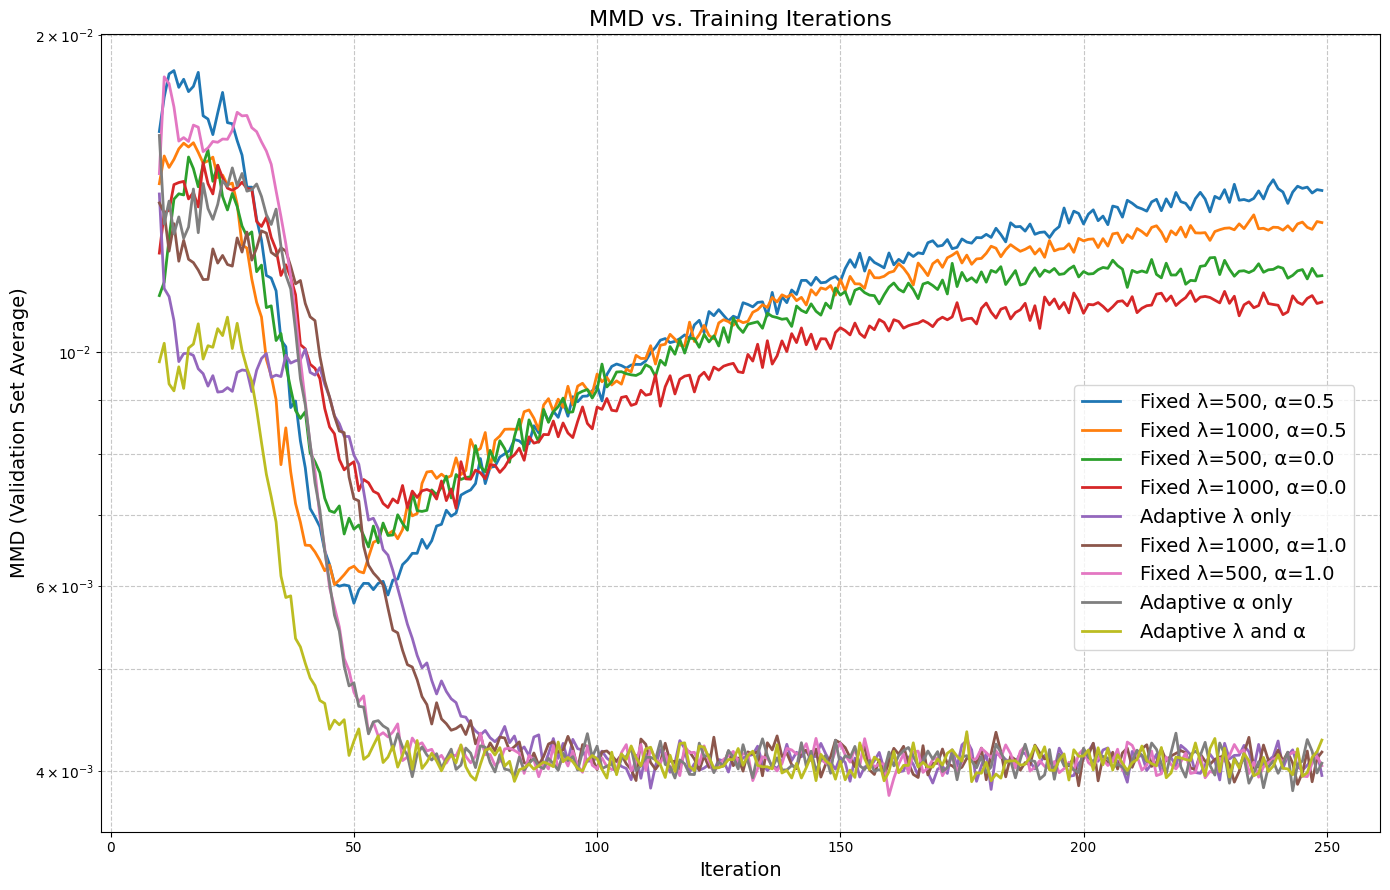

In [ ]:
import matplotlib.pyplot as plt

# number of evals to skip
SKIP = 10

# trim off the first SKIP rows
df_trim = df_mmd.iloc[SKIP:, :]

# x-axis is the evaluation index
iters = df_trim.index

# your desired legend/plot order
desired_order = [
    "Fixed λ=500, α=0.5",
    "Fixed λ=1000, α=0.5",
    "Fixed λ=500, α=0.0",
    "Fixed λ=1000, α=0.0",
    "Adaptive λ only",
    "Fixed λ=1000, α=1.0",
    "Fixed λ=500, α=1.0",
    "Adaptive α only",
    "Adaptive λ and α"
]

fig, ax = plt.subplots(figsize=(14, 9))
for name in desired_order:
    if name in df_trim.columns:
        ax.plot(iters, df_trim[name], linewidth=2, label=name)

ax.set_xlabel('Iteration', fontsize=14)
ax.set_ylabel('MMD (Validation Set Average)', fontsize=14)
ax.set_yscale('log')
ax.grid(which='both', linestyle='--', alpha=0.7)
ax.set_title('MMD vs. Training Iterations', fontsize=16)

# draw legend in the upper‐right, but anchored lower (y=0.9)
ax.legend(
    fontsize=14,
    handlelength=2,
    handletextpad=1.0,
    loc='upper right',
    bbox_to_anchor=(0.98, 0.56),
    borderaxespad=0.0
)

plt.tight_layout()
plt.show()


In [ ]:
df_info

,train_mmd_hist,validation_mmd,semi_sup_error,train_times
MMD,"{'2': [0.028638067511815003, 0.028843836175825...","[0.038014721561302006, 0.046935157652230004, 0...","[0.7175, 0.2821, 0.16240000000000002, 0.126100...","{'2': 31.31805992126465, '5': 31.2748744487762..."
Stein,"{'2': [0.26518795624269403, 0.2776333844704080...","[0.261895077342682, 0.49554917026073303, 0.614...","[0.6041000000000001, 0.3267, 0.204400000000000...","{'2': 31.08826994895935, '5': 30.2634606361389..."
Sinkhorn,"{'2': [0.029389407319100003, 0.028489830137491...","[0.031811968007303, 0.045909306628906, 0.11460...","[0.8991, 0.8966000000000001, 0.906700000000000...","{'2': 70.29918575286865, '5': 73.1148266792297..."
Cramer,"{'2': [0.027996520909052, 0.034532139607444, 0...","[0.033196109446122, 0.050886725273696004, 0.04...","[0.6843, 0.3539, 0.3033, 0.27, 0.2108000000000...","{'2': 32.688263177871704, '5': 32.020914077758..."
Chi2,"{'2': [0.8324961548238561, 0.6166287947322521,...","[0.582800842346029, 0.252023418533041, 0.06405...","[0.6097, 0.299799999999999, 0.176799999999999,...","{'2': 32.818594455718994, '5': 32.843052625656..."


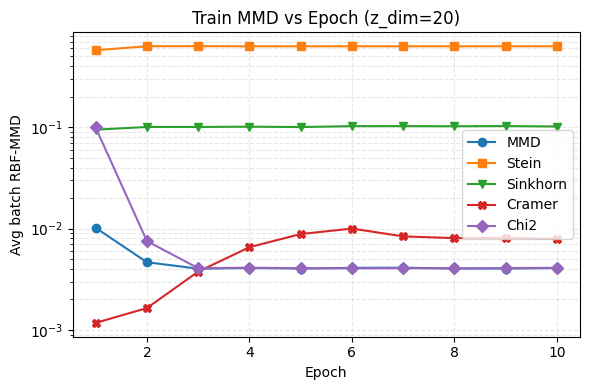

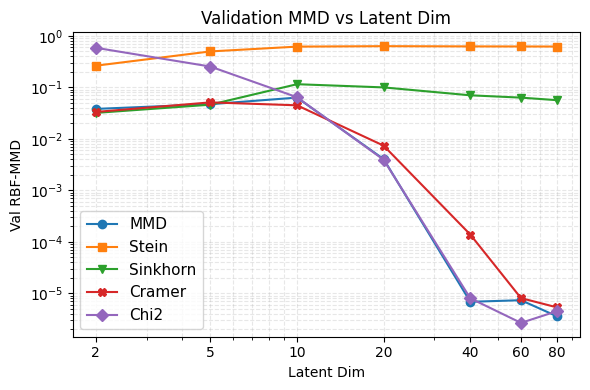

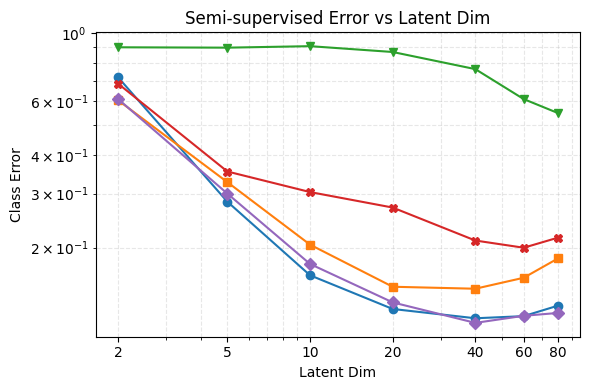

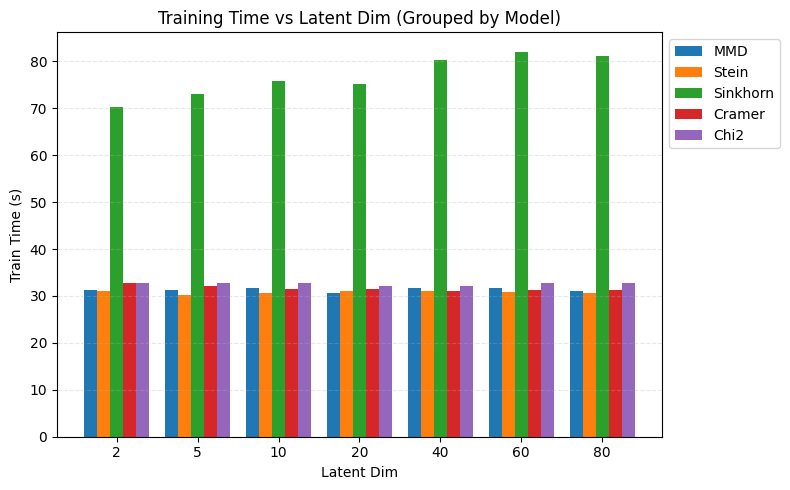

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# settings
divergences = df_info.index.tolist()
dims        = [2, 5, 10, 20, 40, 60, 80]

# pick up num_epochs from the first train_mmd_hist entry
example_hist = df_info.loc[divergences[0], "train_mmd_hist"]
epoch_key    = dims[0]
sample_list  = example_hist.get(epoch_key, example_hist.get(str(epoch_key)))
num_epochs   = len(sample_list)

# define one marker per divergence
markers = ['o', 's', 'v', 'X', 'D']

# ──────────────────────────────────────────────────────────────────────────────
# a) train‐MMD vs epoch at z_dim=20
plt.figure(figsize=(6,4))
for i, name in enumerate(divergences):
    hist_dict = df_info.loc[name, "train_mmd_hist"]
    mmd_list  = hist_dict.get(20, hist_dict.get(str(20)))
    plt.plot(
        range(1, num_epochs+1),
        mmd_list,
        marker=markers[i % len(markers)],
        linestyle='-',
        label=name
    )
plt.xlabel('Epoch')
plt.ylabel('Avg batch RBF-MMD')
plt.title('Train MMD vs Epoch (z_dim=20)')
plt.yscale('log')
plt.grid(which='both', ls='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# ──────────────────────────────────────────────────────────────────────────────
# b) validation MMD vs latent dim
plt.figure(figsize=(6,4))
for i, name in enumerate(divergences):
    val_list = df_info.loc[name, "validation_mmd"]
    plt.plot(
        dims,
        val_list,
        marker=markers[i % len(markers)],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.yscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Val RBF-MMD')
plt.title('Validation MMD vs Latent Dim')
plt.grid(which='both', ls='--', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


# ──────────────────────────────────────────────────────────────────────────────
# c) semi‐sup error vs latent dim
plt.figure(figsize=(6,4))
for i, name in enumerate(divergences):
    err_list = df_info.loc[name, "semi_sup_error"]
    plt.plot(
        dims,
        err_list,
        marker=markers[i % len(markers)],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.yscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Class Error')
plt.title('Semi-supervised Error vs Latent Dim')
plt.grid(which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()


# ──────────────────────────────────────────────────────────────────────────────
# d) training time vs latent dim → grouped bar chart
plt.figure(figsize=(8,5))
n_models    = len(divergences)
bar_width   = 0.8 / n_models
x_positions = np.arange(len(dims))

for i, name in enumerate(divergences):
    time_dict = df_info.loc[name, "train_times"]
    times     = [time_dict.get(d, time_dict.get(str(d))) for d in dims]
    plt.bar(
        x_positions + i*bar_width,
        times,
        width=bar_width,
        label=name
    )

plt.xticks(
    x_positions + bar_width*(n_models-1)/2,
    labels=dims
)
plt.xlabel('Latent Dim')
plt.ylabel('Train Time (s)')
plt.title('Training Time vs Latent Dim (Grouped by Model)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(axis='y', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
df_exp

,ELBOVAE,ReconAE,FreeBitsVAE,BNVAE,BetaVAE,AAE,InfoVAE-MMD,ContrastiveAE,_meta
mmd,"[0.9344246387481691, 0.7099063396453851, 0.518...","[0.827453076839447, 0.5837027430534361, 0.4086...","[0.958639323711395, 0.6853640079498291, 0.5071...","[0.9463260769844051, 0.721315562725067, 0.4877...","[0.98702073097229, 0.701148390769958, 0.658970...","[0.28988271951675404, 0.243240848183631, 0.064...","[0.134902879595756, 0.11217720061540601, 0.070...","[0.088951990008354, 0.094128675758838, 0.04402...",NaN
recon,"[170.26183041992186, 132.63746596679687, 113.5...","[169.239974609375, 128.50797041015625, 102.271...","[168.37755825195313, 133.32841015625, 113.2531...","[175.63352470703126, 149.59473930664063, 127.1...","[175.2134384765625, 147.3021494628906, 140.432...","[168.21624057617188, 133.4421007080078, 104.04...","[165.53120190429686, 131.5918045654297, 110.21...","[168.50011674804688, 137.4959220703125, 115.47...",NaN
ss_err,"[0.6369, 0.5912000000000001, 0.2872, 0.1734, 0...","[0.694299999999999, 0.5253, 0.361299999999999,...","[0.6248, 0.5445, 0.3196, 0.162799999999999, 0....","[0.6886, 0.6573, 0.42560000000000003, 0.2013, ...","[0.7419, 0.5158, 0.32030000000000003, 0.1773, ...","[0.6483, 0.28200000000000003, 0.12660000000000...","[0.6031000000000001, 0.213899999999999, 0.138,...","[0.5931000000000001, 0.2712, 0.1713, 0.1885, 0...",NaN
train_time,"[66.59933590888977, 65.83877086639404, 66.0948...","[66.67581820487976, 64.67531132698059, 64.6209...","[67.0008864402771, 66.36831545829773, 66.26366...","[67.01083564758301, 66.54794549942017, 66.6704...","[66.42520236968994, 66.0282621383667, 66.03643...","[68.87306594848633, 67.99078512191772, 68.2324...","[70.94316720962524, 71.18786382675171, 70.6117...","[69.0223319530487, 68.66344118118286, 68.61071...",NaN
dims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2, 5, 10, 20, 40, 60, 80]"


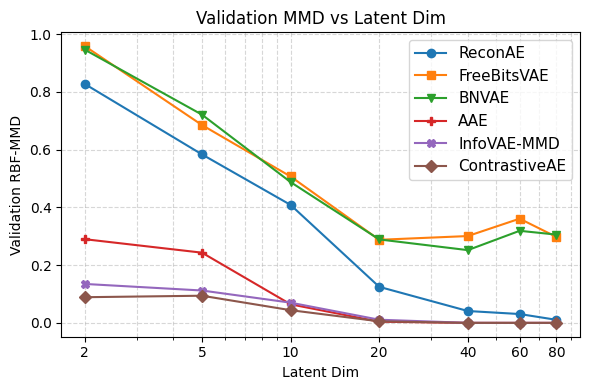

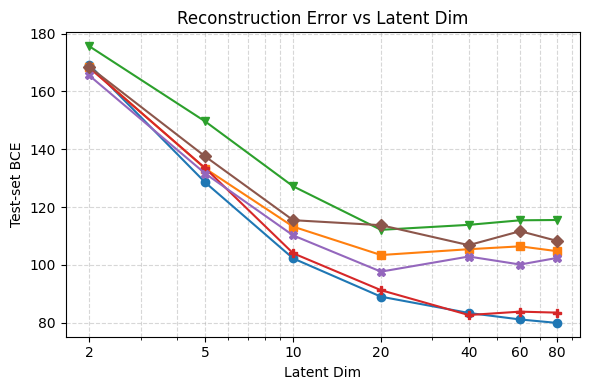

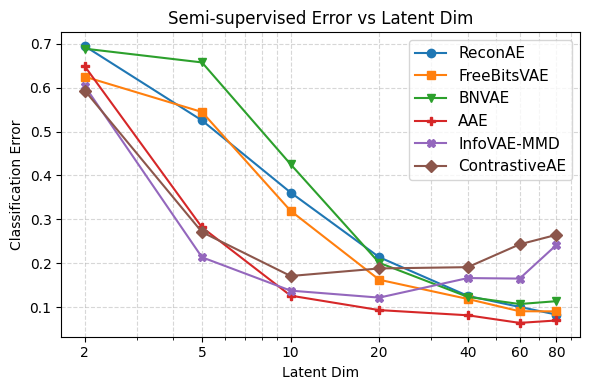

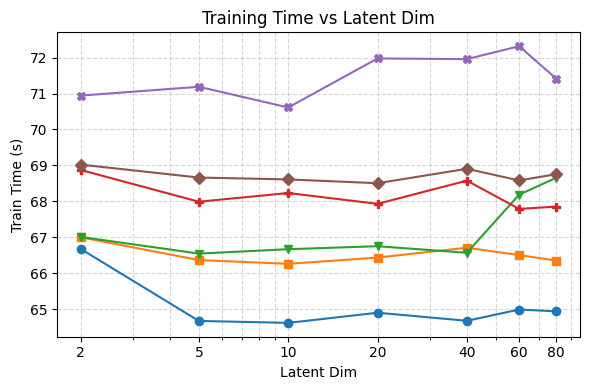

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) extract dims from the `dims` row
dims = df_exp.loc['dims', '_meta']

# 2) pick experiments to include (drop `_meta` plus any you want to exclude)
exclude = {"ELBOVAE", "BetaVAE", "_meta"}
models  = [c for c in df_exp.columns if c not in exclude]

# assign a distinct marker to each model
markers = ['o', 's', 'v', 'P', 'X', 'D']
model_markers = {name: markers[i % len(markers)] for i, name in enumerate(models)}

def get_curve(row_key, name):
    raw = df_exp.loc[row_key, name]
    if not isinstance(raw, (list, np.ndarray)):
        return None
    curve = raw
    for _ in range(3):
        if hasattr(curve, '__len__') and len(curve) == len(dims):
            return curve
        if isinstance(curve, (list, np.ndarray)) and len(curve) == 1:
            curve = curve[0]
        else:
            break
    if hasattr(curve, '__len__') and len(curve) == len(dims):
        return curve
    raise ValueError(
        f"Could not unpack a length-{len(dims)} curve for {row_key}/{name}; got {type(curve)} of length {getattr(curve,'__len__',None)}"
    )

# ──────────────────────────────────────────────────────────────────────────────
# a) Validation MMD vs Latent Dim
plt.figure(figsize=(6,4))
for name in models:
    curve = get_curve('mmd', name)
    if curve is None:
        continue
    plt.plot(
        dims, curve,
        marker=model_markers[name],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Validation RBF-MMD')
plt.title('Validation MMD vs Latent Dim')
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()

# b) Reconstruction BCE vs Latent Dim
plt.figure(figsize=(6,4))
for name in models:
    curve = get_curve('recon', name)
    if curve is None:
        continue
    plt.plot(
        dims, curve,
        marker=model_markers[name],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Test-set BCE')
plt.title('Reconstruction Error vs Latent Dim')
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# c) Semi-supervised Error vs Latent Dim
plt.figure(figsize=(6,4))
for name in models:
    curve = get_curve('ss_err', name)
    if curve is None:
        continue
    plt.plot(
        dims, curve,
        marker=model_markers[name],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Classification Error')
plt.title('Semi-supervised Error vs Latent Dim')
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()

# d) Training Time vs Latent Dim
plt.figure(figsize=(6,4))
for name in models:
    curve = get_curve('train_time', name)
    if curve is None:
        continue
    plt.plot(
        dims, curve,
        marker=model_markers[name],
        linestyle='-',
        label=name
    )
plt.xscale('log')
plt.xticks(dims, labels=dims)
plt.xlabel('Latent Dim')
plt.ylabel('Train Time (s)')
plt.title('Training Time vs Latent Dim')
plt.grid(which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
